In [1]:
import numpy as np 
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, transpile, Aer
from qiskit import IBMQ, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from Hamming import *
import qiskit
%matplotlib inline
from random import randint

In [8]:
# Create a hamming circuit
N = 3
sizeDec=HammingSize(N,'decoder')
sizeEnc=HammingSize(N,'encoder')
circuit = QuantumCircuit(sizeDec,sizeDec)

# Create a input
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.cx(0,2)

# Add the encoder to the circuit
circuit.append(HammingEncode(N), range(sizeEnc))

# Add errors
circuit.y(4)

# Add the decoder to the circuit
circuit.append(HammingDecode(N,read=True),range(sizeDec))

# Measure the qubits
circuit.measure(list(range(N)),list(range(N)))

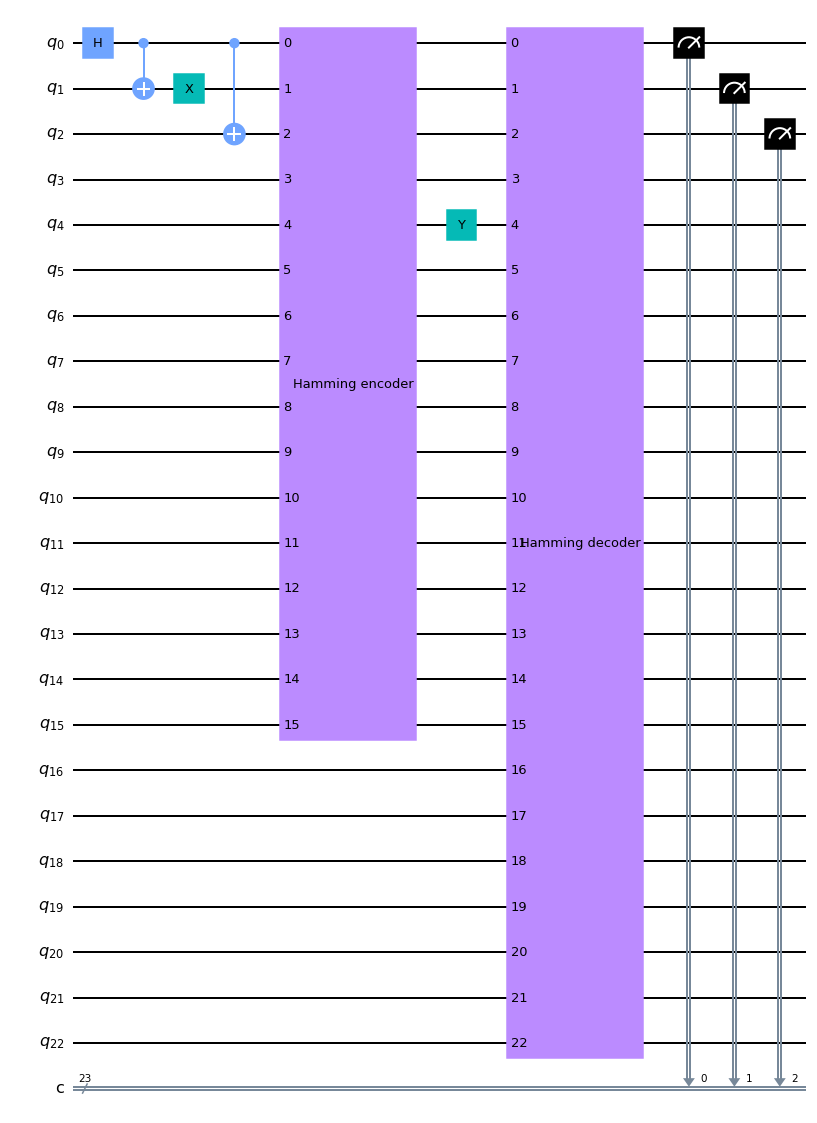

In [9]:
circuit.draw(output='mpl')

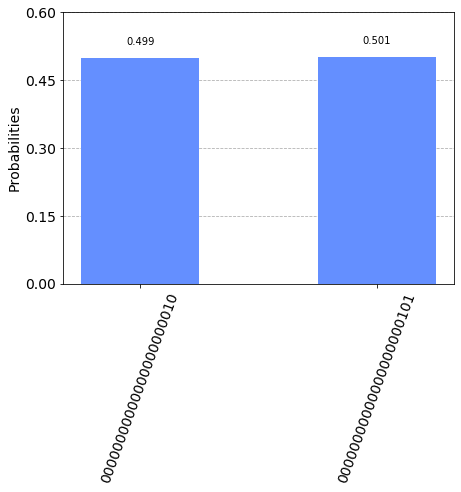

In [10]:
# Simulate the circuit
simulator = Aer.get_backend("qasm_simulator")
result = qiskit.execute(circuit, backend = simulator, shots=1000).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))